In [42]:
import numpy as np
import random
import math
import csv
import matplotlib.pyplot as plt  

In [126]:
## Imprimir Matriz Costos
'''
n = 50
mcostos = np.empty((n,n))
for i in range(0,n):
    mcostos[i,i] = 0
    for j in range(i+1,n):
        mcostos[i,j] = int(random.random()*100)
        mcostos[j,i] = mcostos[i,j]
f = open("/home/dabelloa/Documents/Evolutiva/AgenteViajeroMcostos50.csv",'w')
with f:
    writer = csv.writer(f)
    writer.writerows(mcostos)
'''

In [40]:
def sdmediana(vector):
    suma = 0
    mediana = np.median(vector)
    for i in range(0,len(vector)):
        suma += (vector[i]- mediana)**2
    return math.sqrt(suma/len(vector))

In [173]:
class powerLaw:
    def generate(self, alpha, mult):
        nd = random.random();
        return mult*math.pow((nd),(1/(1-alpha)));
class individuo:
    x=[]
    f=0
    pc = 0
    pm = 0
class agViajero:
    def __init__(self,mcostos):
        self.mcostos = mcostos
    def fitness(self,x):
        costo = 0
        for i in range(1,len(x)):
            costo = costo + self.mcostos[x[i-1],x[i]]
        costo = costo + self.mcostos[x[0],x[len(x)-1]]
        return costo
class ascColina:
    def nuevaGen(self, padre, mult, alpha, func):
        hijo = individuo()
        hijo.x = padre.x.copy()
        pl = powerLaw()
        aCambiar = int(pl.generate(3,2))
        if aCambiar > len(x)/2 - 1:
            aCambiar = len(x)/2 - 1
        if aCambiar < 1:
            aCambiar = 1
        posiciones = []
        for i in range(0,int(aCambiar*2)):
            propuesta = int(random.uniform(0,len(x)))
            aceptable = True
            for j in range(0,len(posiciones)):
                if propuesta == posiciones[j] or propuesta >= len(x):
                    aceptable = False
            if aceptable:
                posiciones.append(propuesta)
            else:
                i = i-1
        for i in range(0, int(len(posiciones)/2)):
            j = int(len(posiciones)/2) + i
            temp = hijo.x[posiciones[i]]
            hijo.x[posiciones[i]] = hijo.x[posiciones[j]]
            hijo.x[posiciones[j]] = temp
        f = func.fitness(hijo.x)
        hijo.f = f        
        if padre.f <= hijo.f:
            return padre
        else:
            return hijo
class haea:
    def iniciarPoblacion(self, n, d, alpha, mult, func):
        p = []
        pl = powerLaw()
        for i in range(0,n):
            temp = individuo()
            x = range(0,d)
            x = np.array(x)
            random.shuffle(x)
            temp.x = x
#             temp.pc = random.random()
#             temp.pm = 1-temp.pc
            pc = random.random()
            pm = random.random()
            temp.pc = pc/(pc+pm)
            temp.pm = pm/(pc+pm)
            temp.f = func.fitness(temp.x)
            p.append(temp)
        return p
    def nuevaGen(self, n, p, alpha,mult,func):
        npob = []
        for i in range(0,n):
            if random.random() < p[i].pc:
                pareja = self.selectorTorneo(p)
                hijo = self.cruce(p[i], pareja, func)
                npob.append(hijo)
            else:
                hijo = self.mutacion(p[i], alpha, mult,func)
                npob.append(hijo)
        return npob
    def selectorTorneo(self, p):
        contrinc = []
        for i in range(0,4):
            pos = int(random.random()*len(p))
            contrinc.append(p[pos])
        contrinc.sort(key=lambda contrinc: contrinc.f)
        return contrinc[0];
    def mutacion(self, padre, alpha, mult, func):
        pl = powerLaw()
        hijo = individuo()
        aCambiar = int(pl.generate(3,2))
        if aCambiar > len(padre.x)/2 - 1:
            aCambiar = len(padre.x)/2 - 1
        if aCambiar < 1:
            aCambiar = 1
        posiciones = []
        for i in range(0,int(aCambiar*2)):
            propuesta = int(random.uniform(0,len(padre.x)))
            aceptable = True
            for j in range(0,len(posiciones)):
                if propuesta == posiciones[j] or propuesta >= len(padre.x):
                    aceptable = False
            if aceptable:
                posiciones.append(propuesta)
            else:
                i = i-1
        x = padre.x.copy()
        for i in range(0, int(len(posiciones)/2)):
            j = int(len(posiciones)/2) + i
            temp = x[posiciones[i]]
            x[posiciones[i]] = x[posiciones[j]]
            x[posiciones[j]] = temp
        hijo.x = x.copy()
        hijo.f = func.fitness(hijo.x)
        pc = individuo.pc
        pm = individuo.pm
        if padre.f <= hijo.f:
            pc = pc + random.random()
            pc = pc/(pc+pm)
            pm = pm/(pc+pm)
            padre.pc = pc
            padre.pm = pm
            return padre
        else:
            pm = pm + random.random()
            pc = pc/(pc+pm)
            pm = pm/(pc+pm)
            hijo.pc = pc
            hijo.pm = pm
            return hijo
    def cruce(self, individuo1,individuo2, func):
        pos = int(random.uniform(0,len(individuo1.x)))
        hijo = individuo()
        x1 = []
        x2 = []
        for i in range(0,pos):
            x1.append(individuo1.x[i])
            x2.append(individuo2.x[i])
        for i in range(pos,len(individuo1.x)):
            k= i
            while True:
                x1t = individuo2.x[k]
                diferente = True
                for j in range(0,len(x1)):
                    if x1t == x1[j]:
                        diferente = False
                if diferente:
                    x1.append(x1t)
                    break
                else:
                    if k < len(individuo2.x)-1:
                        k = k+1
                    else:
                        k = 0
            k= i
            while True:
                x2t = individuo1.x[k]
                diferente = True
                for j in range(0,len(x2)):
                    if x2t == x2[j]:
                        diferente = False
                if diferente:
                    x2.append(x2t)
                    break
                else:
                    if k < len(individuo1.x)-1:
                        k = k+1
                    else:
                        k = 0
        f1 = func.fitness(x1)
        f2 = func.fitness(x2)
        if f1 < f2:
            hijo.x = x1.copy()
            hijo.f = f1
        else:
            hijo.x = x2.copy()
            hijo.f = f2
        padre = individuo()
        padre.x = individuo1.x
        padre.f = individuo1.f
        pc = individuo1.pc
        pm = individuo1.pm
        if padre.f <= hijo.f:
            pm = pm + random.random()
            pc = pc/(pc+pm)
            pm = pm/(pc+pm)
            padre.pc = pc
            padre.pm = pm
            return padre
        else:
            pc = pc + random.random()
            pc = pc/(pc+pm)
            pm = pm/(pc+pm)
            hijo.pc = pc
            hijo.pm = pm
            return hijo
class heuristucaNNMatriz:
    def solucionar(self, n, matriz):
        factibles = list(range(0,n))
        posnuevo = int(random.random()*n)
        x = []
        x.append(factibles[posnuevo])
        factibles = factibles[0:posnuevo] + factibles[posnuevo + 1:]
        while len(factibles) > 0:
            posnuevo = 0
            mindist = matriz[x[len(x)-1],posnuevo]
            for i in range(0,len(factibles)):
                dist = matriz[x[len(x)-1],i]
                if dist < mindist:
                    posnuevo = i
                    mindist = dist
            x.append(factibles[posnuevo])
            factibles = factibles[0:posnuevo] + factibles[posnuevo + 1:]
        return x

In [174]:
#Asc Colina
rows = []
with open('/home/dabelloa/Documents/Evolutiva/AgenteViajeroMcostos.csv') as File:
    reader = csv.reader(File, delimiter=',', quotechar=',',
                        quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        rows.append(row)
    mcostos = np.array(rows)
    mcostos = mcostos.astype(np.float)
n = 100
d = 10
iteraciones = 100
data = []
for z in range(0, n):
    x = np.arange(0,d,1)
    np.random.shuffle(x)
    ind = individuo()
    ind.x = x
    func = agViajero(mcostos)
    ind.f = func.fitness(x)
    alg = ascColina()
    columnasx = []
    columnasy = []
    valoresfitness = []
    valoresfitness.append(ind.f)
    for i in range(0, iteraciones):
        temp = alg.nuevaGen(ind, 4, 2, func)
        ind = temp
        f = ind.f
        valoresfitness.append(f)
    data.append(valoresfitness)
data = np.array(data)

In [175]:
x = np.arange(0, len(data[0,:]))
mediana = []
maximo = []
minimo = []
desvestmn = []
mnsup = []
mninf = []
for i in range(len(data[0,:])):
    mediana.append(np.median(data[:,i]))
    maximo.append(np.max(data[:,i]))
    minimo.append(np.min(data[:,i]))
    desvestmn.append(sdmediana(data[:,i]))
    mnsup.append(np.median(data[:,i])+sdmediana(data[:,i]))
    mninf.append(np.median(data[:,i])-sdmediana(data[:,i]))
print("Mediana: "+str(np.median(data[len(data)-1])))
print("Desv. Est. Mediana: "+str(sdmediana(data[len(data)-1])))
print("Media: "+str(np.mean(data[len(data)-1])))
print("Desviación Estándar: "+str(np.std(data[len(data)-1])))
print("Máximo: "+str(max(data[len(data)-1])))
print("Mínimo: "+str(min(data[len(data)-1])))

Mediana: 370.0
Desv. Est. Mediana: 78.064139660859
Media: 382.9207920792079
Desviación Estándar: 76.98742126500912
Máximo: 653.0
Mínimo: 333.0


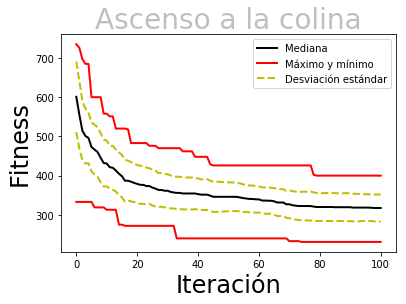

In [176]:
plt.figure()
plt.plot(x, mediana, 'black', linewidth = 2, label = 'Mediana')
plt.plot(x, maximo,'r', linewidth = 2, label = 'Máximo y mínimo')
plt.plot(x, minimo,'r', linewidth = 2)
plt.plot(x, mnsup,'y--', linewidth = 2, label = 'Desviación estándar')
plt.plot(x, mninf,'y--', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel(r"Iteración", fontsize = 24)
plt.ylabel(r"Fitness", fontsize = 24)
plt.title('Ascenso a la colina',fontsize = 28, color = '0.75', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()

In [177]:
#Heurística
rows = []
with open('/home/dabelloa/Documents/Evolutiva/AgenteViajeroMcostos.csv') as File:
    reader = csv.reader(File, delimiter=',', quotechar=',',
                        quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        rows.append(row)
    mcostos = np.array(rows)
    mcostos = mcostos.astype(np.float)
func = agViajero(mcostos)
alg = heuristucaNNMatriz()
n=100
d=10
data = []
for i in range(0,n):
    sol = alg.solucionar(d,mcostos)
    x = sol.copy()
    x.append(sol[0])
    f = func.fitness(x)
    data.append(f)
data = np.array(data)
print("Mediana: "+str(np.median(data)))
print("Desv. Est. Mediana: "+str(sdmediana(data)))
print("Media: "+str(np.mean(data)))
print("Desviación Estándar: "+str(np.std(data)))
print("Máximo: "+str(max(data)))
print("Mínimo: "+str(min(data)))

Mediana: 493.0
Desv. Est. Mediana: 108.3772577619493
Media: 504.97
Desviación Estándar: 107.71420101360823
Máximo: 746.0
Mínimo: 380.0


In [178]:
#HAEA
rows = []
with open('/home/dabelloa/Documents/Evolutiva/AgenteViajeroMcostos.csv') as File:
    reader = csv.reader(File, delimiter=',', quotechar=',',
                        quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        rows.append(row)
    mcostos = np.array(rows)
    mcostos = mcostos.astype(np.float)
n = 100
d = 10
iteraciones = 100
func = agViajero(mcostos)
alg = haea()
p = alg.iniciarPoblacion(n,d,2,4,func)
data = []
pc = []
pm = []
parcial = []
sumapc = 0
sumapm = 0
for j in range(0, len(p)):
    parcial.append(p[j].f)
    sumapc += p[j].pc
    sumapm += p[j].pm
data.append(parcial)
pc.append(sumapc/len(p))
pm.append(sumapm/len(p))
for i in range(0, iteraciones):
    temp = 0
    temp = alg.nuevaGen(n, p, 2, 4, func)
    p = temp
    parcial = []
    sumapc = 0
    sumapm = 0
    for j in range(0, len(p)):
        parcial.append(p[j].f)
        sumapc += p[j].pc
        sumapm += p[j].pm
    data.append(parcial)
    pc.append(sumapc/len(p))
    pm.append(sumapm/len(p))
data = np.array(data)
data = data.transpose()

In [179]:
x = np.arange(0, len(data[0,:]))
mediana = []
maximo = []
minimo = []
desvestmn = []
mnsup = []
mninf = []
for i in range(len(data[0,:])):
    mediana.append(np.median(data[:,i]))
    maximo.append(np.max(data[:,i]))
    minimo.append(np.min(data[:,i]))
    desvestmn.append(sdmediana(data[:,i]))
    mnsup.append(np.median(data[:,i])+sdmediana(data[:,i]))
    mninf.append(np.median(data[:,i])-sdmediana(data[:,i]))
print("Mediana: "+str(np.median(data[len(data)-1])))
print("Desv. Est. Mediana: "+str(sdmediana(data[len(data)-1])))
print("Media: "+str(np.mean(data[len(data)-1])))
print("Desviación Estándar: "+str(np.std(data[len(data)-1])))
print("Máximo: "+str(max(data[len(data)-1])))
print("Mínimo: "+str(min(data[len(data)-1])))

Mediana: 260.0
Desv. Est. Mediana: 53.86304598490766
Media: 261.9207920792079
Desviación Estándar: 53.828786727556206
Máximo: 466.0
Mínimo: 231.0


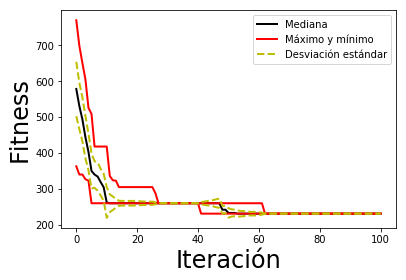

In [180]:
plt.figure()
plt.plot(x, mediana, 'black', linewidth = 2, label = 'Mediana')
plt.plot(x, maximo,'r', linewidth = 2, label = 'Máximo y mínimo')
plt.plot(x, minimo,'r', linewidth = 2)
plt.plot(x, mnsup,'y--', linewidth = 2, label = 'Desviación estándar')
plt.plot(x, mninf,'y--', linewidth = 2)
plt.legend(loc = 1)
plt.xlabel(r"Iteración", fontsize = 24)
plt.ylabel(r"Fitness", fontsize = 24)
# plt.title('HAEA',fontsize = 28, color = '0.75', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()

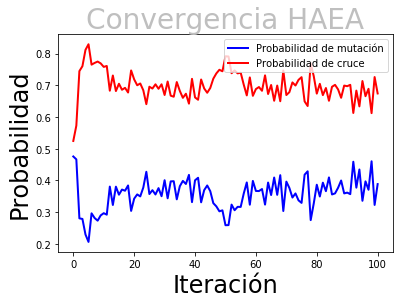

In [181]:
plt.figure()
plt.plot(x, pm, 'b', linewidth = 2, label = 'Probabilidad de mutación')
plt.plot(x, pc,'r', linewidth = 2, label = 'Probabilidad de cruce')
plt.legend(loc = 1)
plt.xlabel(r"Iteración", fontsize = 24)
plt.ylabel(r"Probabilidad", fontsize = 24)
plt.title('Convergencia HAEA',fontsize = 28, color = '0.75', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()